In [24]:
from sklearn.svm import SVR
import numpy as np
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from numpy import loadtxt
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import sys
sys.path.append('..')
db = loadtxt('../darwin.txt', delimiter=',')
db = [round(i,1) for i in db]

In [25]:
y_train = db[0:1299]
y_test = db[1300:]

In [40]:
mod = sm.tsa.statespace.SARIMAX(y_train, trend='c', order=(2,1,1), seasonal_order=(2,1,1,12))
results = mod.fit()
y_pred = results.predict(start = 1300, end = 1399, dynamic = True)
mean_squared_error(y_test, y_pred)

C:\Users\Tirth\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1.3419808963975441

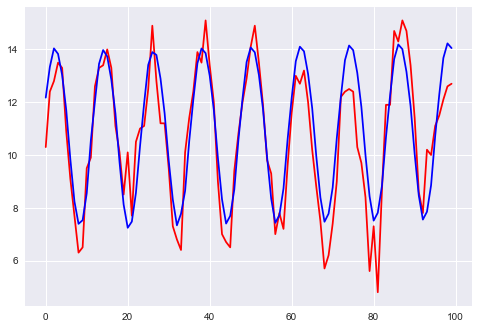

In [41]:
plt.plot(range(len(y_test)), y_test,'r');
plt.plot(range(len(y_pred)), y_pred,'b');
plt.show();